In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns

## Creating a Dummy 3d Matrix for the error data

In [ ]:
def error_sort(error):
  out = []
  for model in error:
    out_model = []
    for corr in model:
      out_model.append(np.sort(corr))
    out.append(out_model)
  return np.array(out)

In [ ]:
## We have 3 models with 4 types of noise
np.random.seed(120)

Shot_noise_BLIP = np.array([77.54, 71.869, 67.175, 58.975, 52.938, 46.669])
Gaussian_noise_BLIP =  np.array([77.54, 76.231, 74.613, 71.688, 67.606, 61.081])
Impulse_noise_BLIP =  np.array([77.54, 74.681, 72.975, 71.281, 66.794, 60.594])
Speckle_noise_BLIP =  np.array([77.54, 76.387, 75.625, 72.513, 70.125, 67.131])
Defocus_blur_BLIP =  np.array([77.54, 74.569, 72.444, 69.244, 66.2, 63.313])
Glass_blur_BLIP =  np.array([77.54, 73.569, 72.144, 70.137, 65.83, 62.013])
Zoom_Blur_BLIP =  np.array([77.54, 66.312, 62.331, 58.888, 55.937, 53.875])
Snow_BLIP =  np.array([77.54, 71.45, 67.888, 67.125, 64.212, 62.706])
Brightness_BLIP =  np.array([77.54, 77.244, 76.413, 75.369, 73.994, 72.462])
Contrast_BLIP =  np.array([77.54, 76.269, 75.225, 73.3, 67.969, 58.613])
Saturation_BLIP =  np.array([77.54, 76.013, 73.869, 72.206, 69.5, 68.463])
Elastic_BLIP =  np.array([77.54, 76.731, 74.869, 72.956,  71.988, 63.431])
Pixelate_BLIP =  np.array([77.54, 76.156, 75.162, 74.344, 72.444, 65.056])
JPEG_compression_BLIP =  np.array([77.54, 76.087, 74.925, 74.169, 71.513, 68.419])
Spatter_BLIP =  np.array([77.54, 76.725, 73.85, 70.788, 70.069, 66.806])

error_BLIP = 100 - np.array([Shot_noise_BLIP, Gaussian_noise_BLIP, Impulse_noise_BLIP, Speckle_noise_BLIP,Defocus_blur_BLIP,Glass_blur_BLIP, Zoom_Blur_BLIP,Snow_BLIP, Brightness_BLIP, Contrast_BLIP, Saturation_BLIP,Elastic_BLIP, Pixelate_BLIP, JPEG_compression_BLIP, Spatter_BLIP])

error_BLIP_large = error_BLIP - abs(np.random.randn(15,6))
error_BLIP_large[:, 0] = error_BLIP_large[0][0]

Shot_noise_ViLT = np.array([71.91, 67.425, 62.556, 54.019, 47.356, 43.112])
Gaussian_noise_ViLT =  np.array([71.91, 70.988, 69.575, 67.131, 63.138, 56.406])
Impulse_noise_ViLT =  np.array([71.91, 70.337, 68.6, 66.563, 62.0, 56.325])
Speckle_noise_ViLT =  np.array([71.91, 71.044, 70.7, 67.912, 66.412, 63.65])
Defocus_blur_ViLT =  np.array([71.91, 70.531, 69.312, 66.787, 64.125, 61.269])
Glass_blur_ViLT =  np.array([71.91, 69.131, 68.112, 63.787, 61.125, 57.269])
Zoom_Blur_ViLT =  np.array([71.91, 60.762, 56.063, 52.756, 49.669, 47.469])
Snow_ViLT =  np.array([71.91, 65.938, 60.45, 57.575, 52.463, 54.25])
Brightness_ViLT =  np.array([71.91, 71.675, 70.913, 69.906, 68.769, 67.156])
Contrast_ViLT =  np.array([71.91, 70.975, 70.169, 68.281, 59.275, 43.344])
Saturation_ViLT =  np.array([71.91, 69.35, 64.119, 70.962, 67.744, 64.4])
Elastic_ViLT =  np.array([71.91, 70.406, 67.112, 70.794, 69.544, 63.4])
Pixelate_ViLT =  np.array([71.91, 71.888, 72.044, 71.6, 70.862, 65.981])
JPEG_compression_ViLT =  np.array([71.91, 71.788, 71.525, 71.006, 69.7, 67.788])
Spatter_ViLT =  np.array([71.91, 71.444, 68.288, 65.156, 63.044, 59.181])

error_ViLT =  100 - np.array([Shot_noise_ViLT, Gaussian_noise_ViLT, Impulse_noise_ViLT, Speckle_noise_ViLT,Defocus_blur_ViLT, Glass_blur_ViLT, Zoom_Blur_ViLT,Snow_ViLT, Brightness_ViLT, Contrast_ViLT, Saturation_ViLT,Elastic_ViLT, Pixelate_ViLT, JPEG_compression_ViLT, Spatter_ViLT])

error_GiT = error_ViLT + abs(4*np.random.randn(15,6))

error_GiT_large = error_GiT - abs(np.random.randn(15,6))
error_GiT_large[:, 0] = error_GiT_large[0][0]

Shot_noise_PNP = np.array([64.8, 59.83, 54.78, 48.31, 41.57, 32.45])
gauss_noise_PNP =  np.array([64.8, 62.6, 61.03, 56.13, 51.09, 44.21])
Impulse_noise_PNP =  np.array([64.8, 60.48, 57.31, 55.89, 50.11, 43.32])
Speckle_noise_PNP =  np.array([64.8, 62.69, 60.74, 56.33, 53.51, 50.26])
Defocus_blur_PNP =  np.array([64.8, 61.58, 59.11, 56.74, 53.66, 49.23])
Glass_blur_PNP =  np.array([64.8, 61.01, 57.11, 50.29, 48.65, 43.62])
Zoom_Blur_PNP =  np.array([64.8, 52.91, 47.47, 41.62, 38.98, 35.38])
Snow_PNP =  np.array([64.8, 58.22, 54.27, 53.18, 50.41, 46.79])
Brightness_PNP =  np.array([64.8, 63.35, 62.67, 60.21, 59.58, 57.218])
Contrast_PNP =  np.array([64.8, 6, 70.169, 68.281, 59.275, 43.344])
Saturation_PNP =  np.array([71.91, 69.35, 64.119, 70.962, 67.744, 64.4])
Elastic_PNP =  np.array([71.91, 70.406, 67.112, 70.794, 69.544, 63.4])
Pixelate_PNP =  np.array([71.91, 71.888, 72.044, 71.6, 70.862, 65.981])
JPEG_compression_PNP =  np.array([71.91, 71.788, 71.525, 71.006, 69.7, 67.788])
Spatter_PNP =  np.array([71.91, 71.444, 68.288, 65.156, 63.044, 59.181])

error_pnp = [Shot_noise_PNP, gauss_noise_PNP, Impulse_noise_PNP, Speckle_noise_PNP, Defocus_blur_PNP, Glass_blur_PNP, Zoom_Blur_PNP, Snow_PNP, Brightness_PNP, Contrast_PNP, Saturation_PNP, Elastic_PNP, Pixelate_PNP, JPEG_compression_PNP, Spatter_PNP]

error = error_sort(np.array([error_BLIP, error_BLIP_large, error_ViLT, error_GiT, error_GiT_large, error_pnp])/100)

In [ ]:
base_error = [error[0][0][0], error[1][0][0], error[2][0][0], error[3][0][0], error[4][0][0], error[5][0][0]]
print(base_error)

[0.22459999999999994, 0.2231255022873857, 0.28090000000000004, 0.30010183158054266, 0.28838547687546595, 0.3245]


In [ ]:
base_error = np.array(base_error)
err_norm = ((base_error - base_error.min())/(base_error.max() - base_error.min()))*0.6 + 0.2
print(err_norm)

[0.20872703 0.2        0.54194693 0.65559582 0.58625084 0.8       ]


In [ ]:
def avg_acc(error):
  acc = 1 - error
  m,c,s = acc.shape
  out = np.zeros((m,c))
  for i in range(m):
    for j in range(c):
      out[i][j] =  np.average(acc[i][j])
  return out

In [ ]:
list(avg_acc(error).T)

[array([0.62527667, 0.63459922, 0.57729667, 0.54285894, 0.55259676,
        0.4971    ]),
 array([0.71459833, 0.71969998, 0.66524667, 0.62769549, 0.63817686,
        0.43356667]),
 array([0.70644167, 0.709622  , 0.65955833, 0.61533521, 0.61977921,
        0.44681667]),
 array([0.73220167, 0.74017233, 0.68604667, 0.6453181 , 0.65589184,
        0.41945   ]),
 array([0.70551667, 0.71014395, 0.67322333, 0.65627124, 0.66474091,
        0.4248    ]),
 array([0.702055  , 0.70904202, 0.65222333, 0.61930197, 0.63689018,
        0.45753333]),
 array([0.624805  , 0.62956282, 0.56438167, 0.52526628, 0.53439449,
        0.5314    ]),
 array([0.68486833, 0.69351129, 0.60431   , 0.57841569, 0.59126143,
        0.45388333]),
 array([0.75503667, 0.76422603, 0.70054833, 0.68255839, 0.6924815 ,
        0.38695333]),
 array([0.71486   , 0.72232577, 0.63992333, 0.60260408, 0.62175148,
        0.48021833]),
 array([0.72931833, 0.73404801, 0.68080833, 0.64392231, 0.65290825,
        0.31919167]),
 array([0.

In [ ]:
models = ['BLIP','BLIP-Large', 'vilt','git', 'git-large', 'pnp']

In [ ]:
types = ['shot', 'gauss', 'impulse', 'speckle', 'defocus', 'glass', 'zoom', 'snow', 'bright', 'contrast', 'saturate', 'elastic', 'pixelate', 'jpeg', 'splatter']
len(types)

15

In [ ]:
error[0][0].shape

(6,)

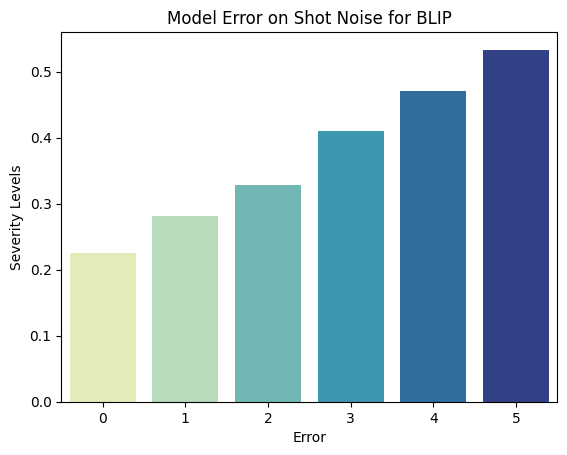

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create some data
x = np.array([0,1,2,3,4,5])
y = error[0][0]

# Make the barplot
sns.barplot(x=x, y=y, palette = 'YlGnBu')

# Add a title
plt.title("Model Error on Shot Noise for BLIP")
plt.xlabel("Error")
plt.ylabel("Severity Levels")
# Show the plot
plt.show()


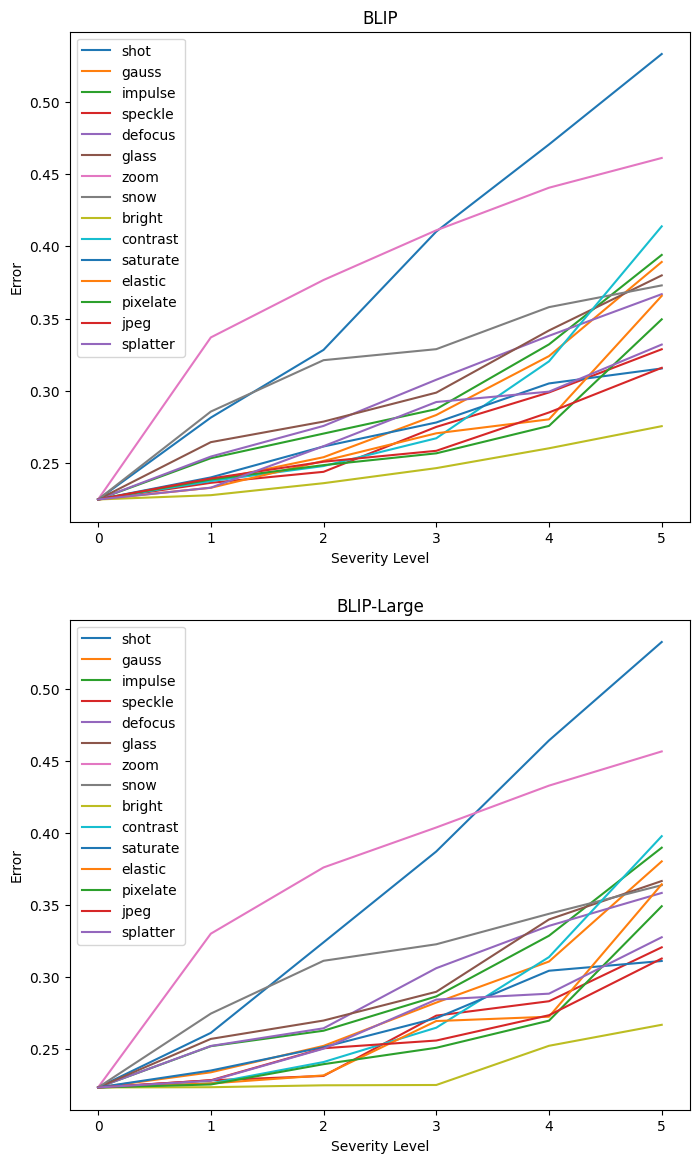

In [ ]:
import matplotlib.pyplot as plt
model_no1 = 0
model_no2 = 1

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 14))
x = [0, 1, 2, 3, 4, 5]

for i in range(len(error[model_no1])):
  ax[0].plot(x, error[model_no1][i], label = types[i])

ax[0].set_title(models[model_no1])
ax[0].set_xlabel('Severity Level')
ax[0].set_ylabel('Error')
ax[0].legend()

for i in range(len(error[model_no2])):
  ax[1].plot(x, error[model_no2][i], label = types[i])

ax[1].set_title(models[model_no2])
ax[1].set_xlabel('Severity Level')
ax[1].set_ylabel('Error')
ax[1].legend()

plt.show()

In [ ]:
print(error.shape) #model, corruption, severity (M,C,S)
print(error[0].shape) #corruption, severity for the first model
print(error[0][0]) #severity values for the first model's first corruption
print(error[0][0][0]) #severity value of the first model's, first corruption's, first severity 

(6, 15, 6)
(15, 6)
[0.2246  0.28131 0.32825 0.41025 0.47062 0.53331]
0.22459999999999994


# Severity Aggregators

## First-Drop

In [ ]:
def firstDrop(error_model):
  #error_model indicates error for a particular model
  #input is a (C,S) matrix where C is the number of corruptions and S is the number of severities
  out = []
  for i in error_model:
    out.append((i[1] - i[0])/i[0])
    #out.append((i[1] - i[0])/1)
  return np.array(out)

In [ ]:
print(firstDrop(error[0]))
print(firstDrop(error[1]))
#print(firstDrop(error[2]))
f = np.array([firstDrop(error[0]),firstDrop(error[1])])

[0.25249332 0.05828139 0.12729297 0.05133571 0.13227961 0.17680321
 0.49991095 0.27114871 0.01317898 0.05658949 0.06798753 0.03601959
 0.06162066 0.06469279 0.03628673]
[0.17002133 0.04712048 0.12858397 0.02233187 0.12924269 0.15118642
 0.47903328 0.23003908 0.00077999 0.0127344  0.0527092  0.01252608
 0.0092865  0.02232513 0.02104665]


## Range of Error

In [ ]:
def errorRange(error_model):
  #error_model indicates error for a particular model
  #input is a (C,S) matrix where C is the number of corruptions and S is the number of severities
  out = []
  for i in error_model:
    out.append(i.max() - i.min())
  return np.array(out)

In [ ]:
print(errorRange(error[0]))
print(errorRange(error[1]))
#print(errorRange(error[2]))
rg = np.array([errorRange(error[0]),errorRange(error[1])])

[0.30871 0.16459 0.16946 0.10409 0.14227 0.15527 0.23665 0.14834 0.05078
 0.18927 0.09077 0.14109 0.12484 0.09121 0.10734]
[0.30963038 0.15713878 0.16666279 0.09740362 0.13520956 0.1434908
 0.233569   0.14058976 0.04355592 0.1746528  0.08788279 0.14121439
 0.12596986 0.08960011 0.10440505]


## Rate of Error

In [ ]:
def rateError(error_model):
  #error_model indicates error for a particular model
  #input is a (C,S) matrix where C is the number of corruptions and S is the number of severities
  out = []
  for i in error_model:
    x = np.array(range(i.shape[0]))
    y = i
    slope, intercept, r, p, std_err = stats.linregress(x, y)
    out.append(slope)
  return np.array(out)

In [ ]:
print(rateError(error[0]))
print(rateError(error[1]))
#print(rateError(error[2]))
rt = np.array([rateError(error[0]),rateError(error[1])])

[0.06267086 0.03174143 0.03145286 0.02112657 0.028412   0.02938829
 0.04368371 0.02761343 0.01033829 0.03470286 0.01902486 0.02476771
 0.02124971 0.01716657 0.02191429]
[0.06346095 0.02990923 0.03107023 0.01982196 0.02766525 0.02818653
 0.0429814  0.02635872 0.00869561 0.03315574 0.01907549 0.0252269
 0.02212306 0.01682924 0.02107478]


## Average Error

In [ ]:
def avgError(error_model):
  #error_model indicates error for a particular model
  #input is a (C,S) matrix where C is the number of corruptions and S is the number of severities
  out = []
  for i in error_model:
    out.append(np.average(i))
  return np.array(out)

In [ ]:
print(avgError(error[0]))
print(avgError(error[1]))
#print(avgError(error[2]))
ag = np.array([avgError(error[0]),avgError(error[1])])

[0.37472333 0.28540167 0.29355833 0.26779833 0.29448333 0.297945
 0.375195   0.31513167 0.24496333 0.28514    0.27068167 0.27080833
 0.26549667 0.262245   0.27370333]
[0.36540078 0.28030002 0.290378   0.25982767 0.28985605 0.29095798
 0.37043718 0.30648871 0.23577397 0.27767423 0.26595199 0.26441143
 0.25949432 0.25723371 0.2668446 ]


## Corruption Difference

In [ ]:
def corrDiff(error_model):
  #error_model indicates error for a particular model
  #input is a (C,S) matrix where C is the number of corruptions and S is the number of severities
  out = []
  error_model_diff = error_model[:,1:]-error_model[:,0].reshape((error_model[:,0].shape[0],1))
  for i in error_model_diff:
    out.append(np.average(i))
  return np.array(out)

In [ ]:
print(corrDiff(error[0]))
print(corrDiff(error[1]))
#print(corrDiff(error[2]))
cd = np.array([corrDiff(error[0]),corrDiff(error[1])])

[0.180148 0.072962 0.08275  0.051838 0.08386  0.088014 0.180714 0.108638
 0.024436 0.072648 0.055298 0.05545  0.049076 0.045174 0.058924]
[0.17073033 0.06860943 0.08070299 0.04404261 0.08007666 0.08139897
 0.17677401 0.10003585 0.01517816 0.06545847 0.05139179 0.04954311
 0.04364259 0.04092985 0.05246292]


# Visualizations

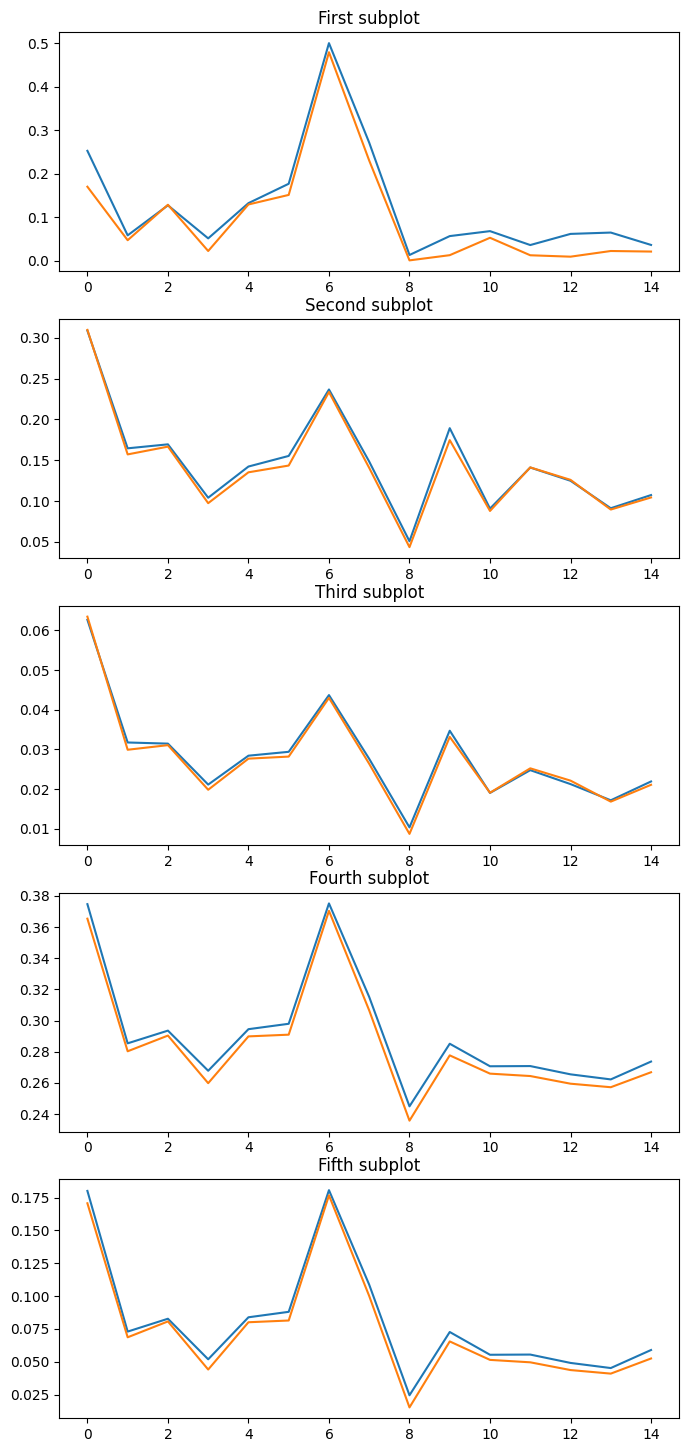

In [ ]:
import matplotlib.pyplot as plt

# Create a figure object and an array of 5 axes objects
fig, axs = plt.subplots(5, 1, figsize=(8, 18))

# Add some data to the first subplot
axs[0].plot(f.T)
axs[0].set_title('First subplot')

# Add some data to the second subplot
axs[1].plot(rg.T)
axs[1].set_title('Second subplot')

# Add some data to the third subplot
axs[2].plot(rt.T)
axs[2].set_title('Third subplot')

# Add some data to the fourth subplot
axs[3].plot(ag.T)
axs[3].set_title('Fourth subplot')

# Add some data to the fifth subplot
axs[4].plot(cd.T)
axs[4].set_title('Fifth subplot')

# Show the plot
plt.show()

In [ ]:
allMetrics = np.array([f[0], rg[0], rt[0], ag[0], cd[0]])
# Create some sample data
i = 2
x = range(4)
y1 = f[i]
y2 = rg[i]
y3 = rt[i]
y4 = ag[i]
y5 = cd[i]

# Create a figure object and an axes object
fig, ax = plt.subplots()

# Add the two data series to the plot
ax.plot(x, y1, label='First Drop')
ax.plot(x, y2, label='Range')
ax.plot(x, y3, label='Rate')
ax.plot(x, y4, label='Average')
ax.plot(x, y5, label='Difference')

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()

NameError: ignored

# Severity Aggregation Matrix

In [ ]:
def corrInd(metricMat):
  norm_metric = []
  for metric in metricMat:
    norm_model = []
    for metricCorr in metric.T:
      norm_cor = (metricCorr - metricCorr.min())/(metricCorr.max() - metricCorr.min())
      norm_model.append(norm_cor)
    norm_metric.append(np.array(norm_model).T)
  return np.array(norm_metric)

In [ ]:
error.shape

In [ ]:
def severityAggMatrix(error, norm = 1):
  fd, rg, rt, av, cd = [], [], [], [], []
  for i in range(error.shape[0]): # The number of models
    error_model =  error[i]
    fd.append(firstDrop(error_model))
    rg.append(errorRange(error_model))
    rt.append(rateError(error_model))
    av.append(avgError(error_model))
    cd.append(corrDiff(error_model))

  metricMat = np.array([fd, rg, rt, av, cd]) #(metric, model, corruption)
  if(norm):
    out = corrInd(metricMat)
  else:
    out = metricMat
  return np.array(out)

In [ ]:
severityAggMatrix(error, norm = 0)[0] #(Metrics, Models, Corruptions)

In [ ]:
severityAggMatrix(error)[0] #(Metrics, Models, Corruptions)

In [ ]:
def corruptionAgg(error):
  sevMatrix = severityAggMatrix(error)
  metricMat = []
  for i in range(sevMatrix.shape[0]): # The metrices
    metricModelMat = sevMatrix[i]
    corAggModel = (np.sum(metricModelMat, axis = 1))/metricModelMat.shape[1]
    metricMat.append(corAggModel)
  return np.array(metricMat)

In [ ]:
corruptionAgg(error)

In [ ]:
err_norm

array([0.20872703, 0.2       , 0.54194693, 0.65559582, 0.58625084,
       0.8       ])

In [ ]:
corAgg = corruptionAgg(error)
corAgg[3] = err_norm
print(corAgg)

[[0.61871458 0.35926585 0.20032809 0.52366909 0.63796146 0.58738166]
 [0.42842196 0.35801889 0.16530292 0.5797988  0.66183754 0.64032564]
 [0.40323503 0.3687013  0.17327571 0.54505631 0.61405324 0.62464324]
 [0.20872703 0.2        0.54194693 0.65559582 0.58625084 0.8       ]
 [0.38234548 0.26218496 0.16652266 0.51217107 0.61094621 0.74386966]]


Text(0, 0.5, 'Score')

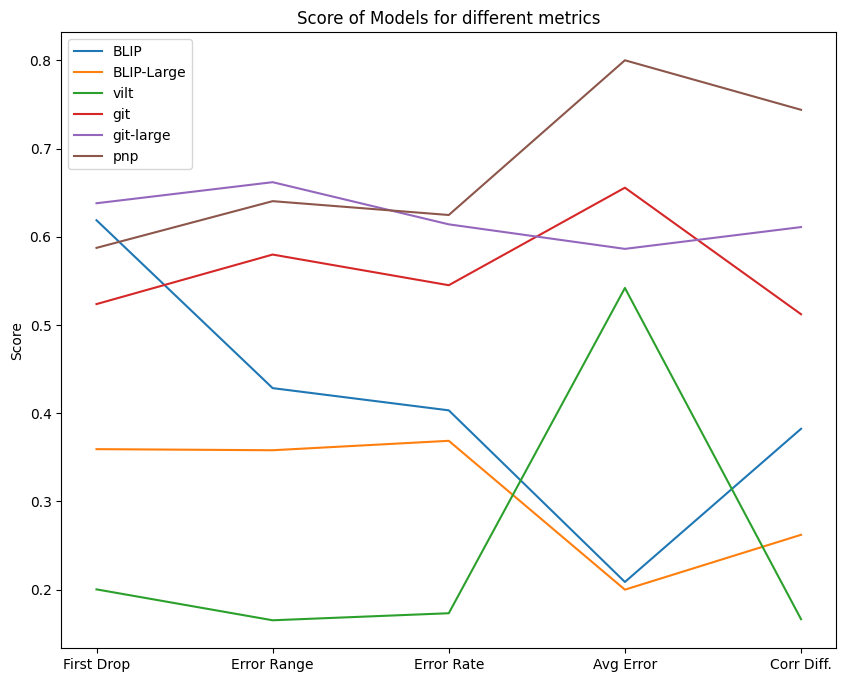

In [ ]:
import seaborn as sns
#corAgg = corruptionAgg(error)
#corAgg[3] = err_norm
plt.figure(figsize=(10, 8))
plt.plot(corAgg)
#plt.legend(['V','Q','A'])
plt.legend(models)
labels = ['First Drop', 'Error Range', 'Error Rate', 'Avg Error', 'Corr Diff.']
plt.title("Score of Models for different metrics")
plt.xticks([0, 1,2,3,4], labels) 
plt.ylabel("Score")

In [ ]:
corAgg.T.shape

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data
categories = models
corAgg = corruptionAgg(error)

#values1 = vreAlpha(error, 0.0)
#values2 = vreAlpha(error, 0.5)
#values3 = vreAlpha(error, 1.0)

# Combine the data into a DataFrame
data = pd.DataFrame({'Category': categories, 'α = 0': values1, 'α = 0.5': values2, 'α =1': values3})

# Reshape the data into a long format
data_long = data.melt(id_vars='Category', var_name='Value of α')

plt.figure(figsize=(8, 6)) 
# Create a multi-bar graph
#sns.barplot(x='Category', y='value', hue='Value of α', data=data_long, palette = 'YlGnBu')

plt.plot(corAgg.T, linewidth = 2.5, marker = 'o')

labels = ['First Drop', 'Error Range', 'Error Rate', 'Avg Error', 'Corr Diff.']
plt.xticks([0, 1,2,3,4], labels) 

# Add labels and title
plt.ylabel('VRE Score')
plt.title('VRE Score of Models for different metrics')
plt.legend(models)
# Show the plot
plt.show()


NameError: ignored

In [ ]:
def vreAlpha(error, alpha = 0.5):
  beta = (1-alpha)/4
  wt = [beta, beta, beta, alpha, beta]
  return calculateVRE(error, weight = wt)

In [ ]:
def calculateVRE(error, weight = [1,1,1,1,1]):
  out = []
  w = np.array(weight)
  corrAgg = corruptionAgg(error)
  for modelError in corrAgg:
    vre = w[0]*modelError[0] + w[1]*modelError[1] + w[2]*modelError[2] + w[3]*modelError[3] + w[4]*modelError[4]
    vre = vre/np.sum(w)
    out.append(vre)
  return np.array(out)

In [ ]:
for i in [0,0.25,0.5,0.75,1]:
  print(vreAlpha(error, i))


In [ ]:
sns.barplot(x = models, y = y, palette = '')


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data
categories = models
values1 = vreAlpha(error, 0.0)
values2 = vreAlpha(error, 0.5)
values3 = vreAlpha(error, 1.0)

# Combine the data into a DataFrame
data = pd.DataFrame({'Category': categories, 'α = 0': values1, 'α = 0.5': values2, 'α =1': values3})

# Reshape the data into a long format
data_long = data.melt(id_vars='Category', var_name='Value of α')

plt.figure(figsize=(8, 6)) 
# Create a multi-bar graph
sns.barplot(x='Category', y='value', hue='Value of α', data=data_long, palette = 'YlGnBu')

plt.plot(values2, linewidth = 2.5)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('VRE Score')
plt.title('VRE Score of Models for varying α')

# Show the plot
plt.show()


NameError: ignored

In [ ]:
print(values2)

In [ ]:
import seaborn as sns

y = vreAlpha(error, 0.5)
sns.barplot(x = models, y = y, palette = 'Spectral')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data
categories = ['A', 'B', 'C', 'D', 'E']
values1 = [0.45817926, 0.33704275, 0.17635735, 0.54017382, 0.63119961]
values2 = [0.34983007, 0.25278207, 0.18883631, 0.49532373, 0.55309304]
values3 = [0.24148087, 0.16852138, 0.20131527, 0.45047365, 0.47498647]

# Combine the data into a DataFrame
data = pd.DataFrame({'Category': categories, 'Value 1': values1, 'Value 2': values2, 'Value 3': values3})

# Reshape the data into a long format
data_long = data.melt(id_vars='Category', var_name='Value')

# Create a multi-bar graph
sns.barplot(x='Category', y='value', hue='Value', data=data_long)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Multi-Bar Graph')

# Show the plot
plt.show()


In [ ]:
corAgg = corruptionAgg(error)
# Create some sample data
i = 2
x = range(4)
y1 = f[i]
y2 = rg[i]
y3 = rt[i]
y4 = ag[i]
y5 = cd[i]

# Create a figure object and an axes object
fig, ax = plt.subplots()

# Add the two data series to the plot
ax.plot(x, y1, label='First Drop')
ax.plot(x, y2, label='Range')
ax.plot(x, y3, label='Rate')
ax.plot(x, y4, label='Average')
ax.plot(x, y5, label='Difference')

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()

In [ ]:
import pandas as pd

data = {
    'Model': ['Base PNP', 'Cosine', 'CLIP', 'BLEU', 'BLEU+CLIP'],
    'Accuracy': [53.52, 53.91, 55.68, 54.12, 60.36],
    'Speedup': [41.10, 40.31, 31.15, 35.86, 22.25]
}

df = pd.DataFrame(data)
print(df)


In [ ]:
import seaborn as sns
sns.scatterplot(data=df, x='Model', y='Accuracy', size='Speedup', sizes=(100, 400))
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy with Speedup')
plt.xticks(rotation=45)
plt.show()

In [ ]:
x = []
y = 